 ## RANDOM FOREST
 
 L'obiettivo è quello di creare un algoritmo che preveda il tipo di pinguino

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
data = pd.read_csv("./penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Dobbiamo cercare di capire qui featuers sono utili:
- dimensione becco
- la pinna
- il peso

In [11]:
features = ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]

In [13]:
# dropna permette di eliminare i nan anche da un solo sottoinsieme di colonne

data.dropna(inplace=True, subset=features+["species"]) # species è la variabile target

In [14]:
X = data[features].values
y = data["species"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [18]:
foresta = RandomForestClassifier(max_depth=5, n_estimators=100)

# max_depth --> massima profondità singolo albero
# n_estimators --> numero di alberi

In [19]:
# addestramento

foresta.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [24]:
# valutazione accuratezza

acc_train = foresta.score(X_train, y_train) # accuratezza con dati di train
acc_test = foresta.score(X_test, y_test) # accuratezza con dati di test

print(f"Accuratezza di train: {acc_train}")
print(f"Accuratezza di test: {acc_test}")

Accuratezza di train: 1.0
Accuratezza di test: 0.9805825242718447


### ESERCIZIO

Livello di accuratezza al variare di max_depth

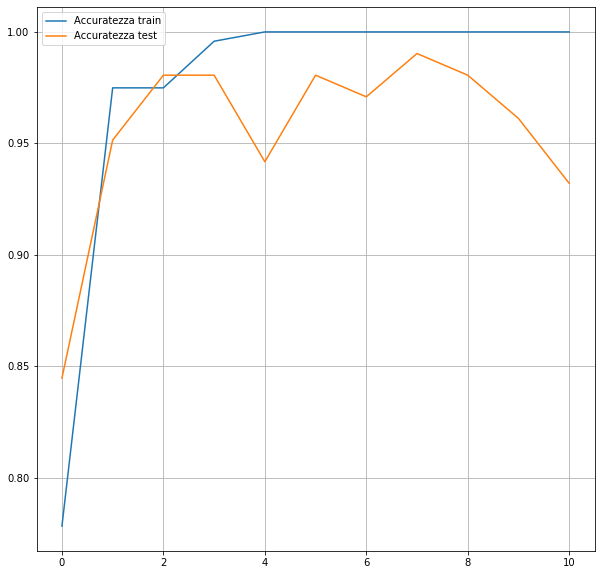

In [35]:
accs_train = []
accs_test = []

for i in range(1,12):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
    foresta = RandomForestClassifier(max_depth=i, n_estimators=100)
    foresta.fit(X_train, y_train)
    accs_train.append(foresta.score(X_train, y_train))
    accs_test.append(foresta.score(X_test, y_test))
    

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(accs_train, label="Accuratezza train")
ax.plot(accs_test, label="Accuratezza test")
ax.legend()
ax.grid()
plt.show()

### ESERCIZIO

Livello di accuratezza al variare di n_estimators

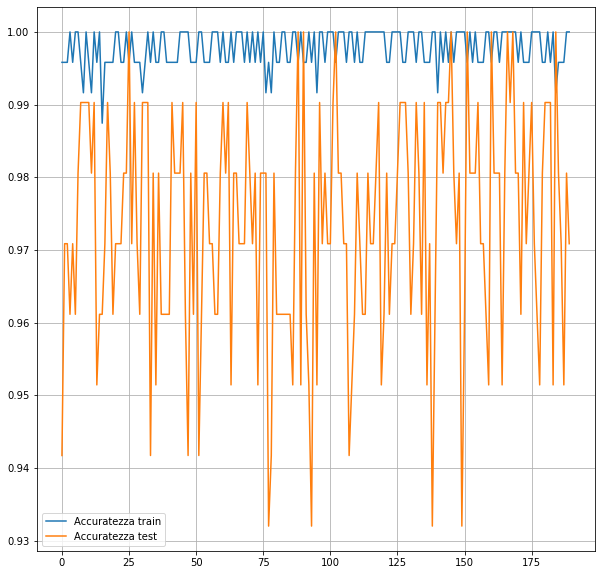

In [36]:
accs_train = []
accs_test = []

for i in range(10,200):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
    foresta = RandomForestClassifier(max_depth=5, n_estimators=i)
    foresta.fit(X_train, y_train)
    accs_train.append(foresta.score(X_train, y_train))
    accs_test.append(foresta.score(X_test, y_test))
    

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(accs_train, label="Accuratezza train")
ax.plot(accs_test, label="Accuratezza test")
ax.legend()
ax.grid()
plt.show()